# Network Comparison by Language 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

In [2]:
ANALYSIS_DIR = "./analysis_results"
os.makedirs(ANALYSIS_DIR, exist_ok=True)
OUTPUT_DIR = "./analysis_results/common"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [3]:
def load_comparison_data(base_dir):
    all_metrics = []
    
    if not os.path.exists(base_dir):
        print(f"Directory {base_dir} does not exist.")
        return pd.DataFrame()

    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):
            metrics_file = os.path.join(folder_path, "global_metrics.csv")
            if os.path.exists(metrics_file):
                try:
                    df = pd.read_csv(metrics_file)
                    # Ensure language column exists or use folder name
                    if 'language' not in df.columns:
                        df['language'] = folder
                    all_metrics.append(df)
                except Exception as e:
                    print(f"Error reading {metrics_file}: {e}")
    
    if all_metrics:
        return pd.concat(all_metrics, ignore_index=True)
    else:
        print("No global_metrics.csv files found.")
        return pd.DataFrame()

def load_node_metrics(base_dir):
    all_metrics = []
    if not os.path.exists(base_dir):
        return pd.DataFrame()
    
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):
            metrics_file = os.path.join(folder_path, "node_metrics.csv")
            if os.path.exists(metrics_file):
                try:
                    df = pd.read_csv(metrics_file)
                    # Simplify language name for display
                    clean_lang = folder.replace('_bluesky_posts', '')
                    df['language'] = clean_lang
                    
                    if 'post_count' in df.columns:
                        all_metrics.append(df[['language', 'keyword', 'post_count']])
                except Exception as e:
                    print(f"Error reading {metrics_file}: {e}")
                    
    if all_metrics:
        return pd.concat(all_metrics, ignore_index=True)
    else:
        return pd.DataFrame()

In [4]:
df_comparison = load_comparison_data(ANALYSIS_DIR)
df_nodes = load_node_metrics(ANALYSIS_DIR)

if not df_comparison.empty:
    print("Loaded comparison data:")
    display(df_comparison)
else:
    print("No global data to visualize.")
    
if not df_nodes.empty:
    print(f"Loaded node metrics for {len(df_nodes['language'].unique())} languages.")
    display(df_nodes)
else:
    print("No node metrics data found.")

Loaded comparison data:


,language,nodes,edges,density,diameter,avg_degree,avg_strength,modularity,global_clustering
0,Germany,18,76,0.496732,2,8.444444,133.111111,0.171459,0.679245
1,Global,18,99,0.647059,3,11.000000,193.333333,0.222328,0.754768
2,Italy,17,44,0.323529,3,5.176471,64.941176,0.128538,0.453020
3,LLM,18,57,0.372549,4,6.333333,62.555556,0.280750,0.565116
4,Portugal,18,82,0.535948,2,9.111111,193.222222,0.156463,0.656962
5,Spain,18,73,0.477124,3,8.111111,188.222222,0.151241,0.625592


Loaded node metrics for 6 languages.


,language,keyword,post_count
0,Germany,Katastrophe,1216
1,Germany,co2,1362
2,Germany,Emissionen,1141
3,Germany,Erderwärmung,975
4,Germany,Aussterben,1001
...,...,...,...
102,Spain,energía renovable,643
103,Spain,desinformación,990
104,Spain,antropogénico,126
105,Spain,derretimiento de glaciares,18


In [5]:
def plot_comparison(df, metrics_to_plot):
    if df.empty:
        return
        
    # Set language as index for easier plotting if unique
    plot_df = df.set_index('language') if 'language' in df.columns else df
    
    for metric in metrics_to_plot:
        if metric not in plot_df.columns:
            print(f"Metric '{metric}' not found in data.")
            continue
            
        plt.figure(figsize=(10, 6))
        sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")
        plt.title(f"Comparison of {metric.replace('_', ' ').title()}", fontsize=16)
        plt.xlabel("Language / Dataset")
        plt.ylabel(metric.replace('_', ' ').title())
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.savefig(f"{OUTPUT_DIR}/comparison_{metric}.png")
        plt.show()
        
def plot_posts_per_keyword(df):
    if df.empty:
        print("No node metrics data to visualize.")
        return
    
    # Combine language and keyword to avoid confusion in plots when keywords overlap
    df['lang_keyword'] = df['language'] + ": " + df['keyword']
    
    plt.figure(figsize=(16, 8))
    sns.barplot(data=df, x='lang_keyword', y='post_count', hue='language', palette='dark', width=0.9)
    
    plt.title("Post Count per Keyword by Language", fontsize=18, fontweight='bold')
    plt.xlabel("Keyword", fontsize=14)
    plt.ylabel("Number of Posts", fontsize=14)
    plt.xticks(rotation=90, ha='center', fontsize=9)
    plt.legend(title='Language', fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/comparison_posts_per_keyword.png")
    plt.show()
    
def plot_total_posts_by_language(df):
    if df.empty:
        print("No node metrics data to visualize for total posts by language.")
        return

    # Calculate total posts per language
    total_posts_by_lang = df.groupby('language')['post_count'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=total_posts_by_lang, x='language', y='post_count', palette='viridis')

    plt.title("Total Posts by Language", fontsize=18, fontweight='bold')
    plt.xlabel("Language", fontsize=14)
    plt.ylabel("Total Number of Posts", fontsize=14)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/comparison_total_posts_by_language.png")
    plt.show()



C:\Users\Oscar\AppData\Local\Temp\ipykernel_6352\3411626259.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


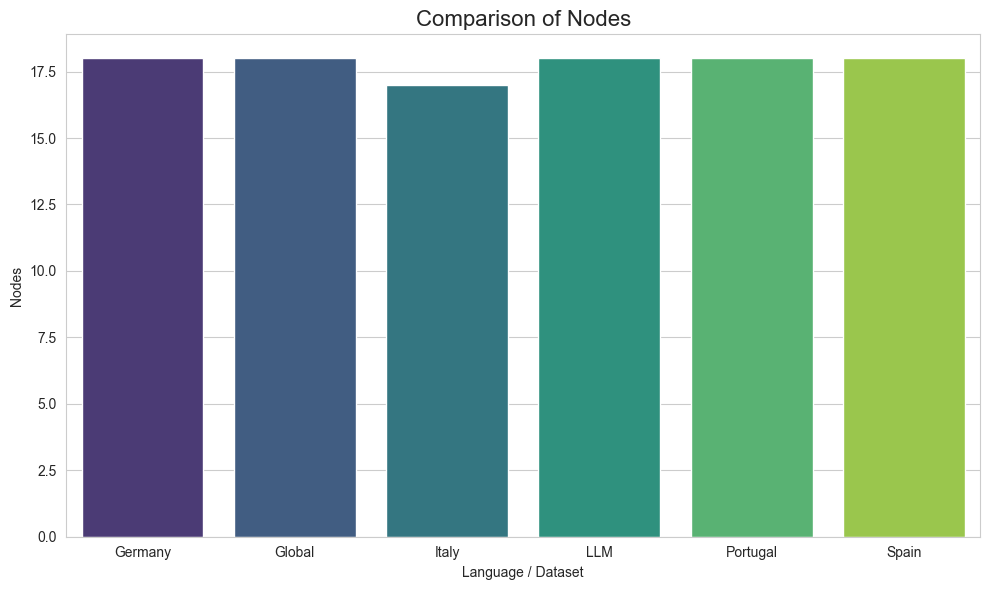

C:\Users\Oscar\AppData\Local\Temp\ipykernel_6352\3411626259.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


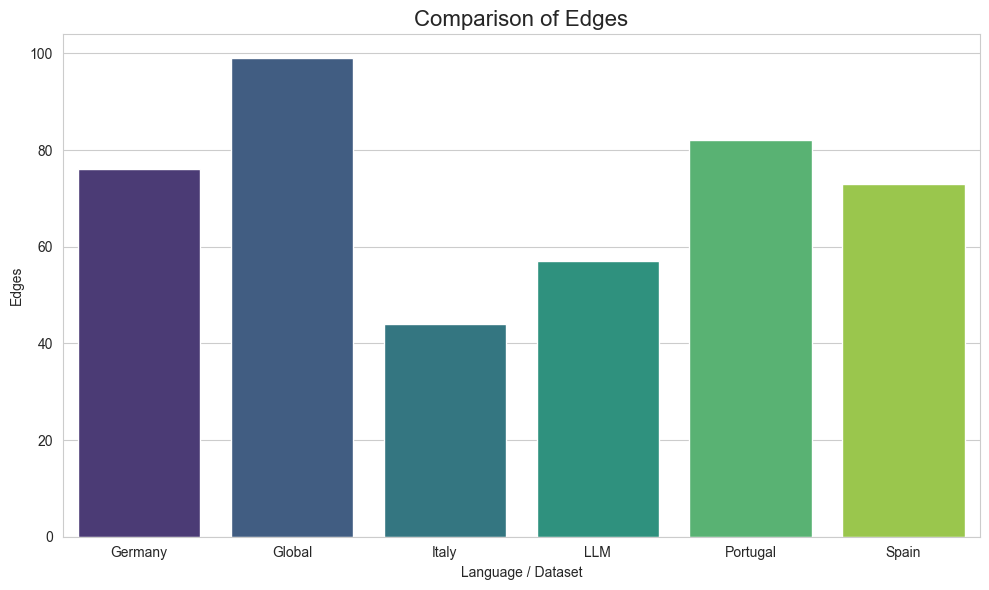

C:\Users\Oscar\AppData\Local\Temp\ipykernel_6352\3411626259.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


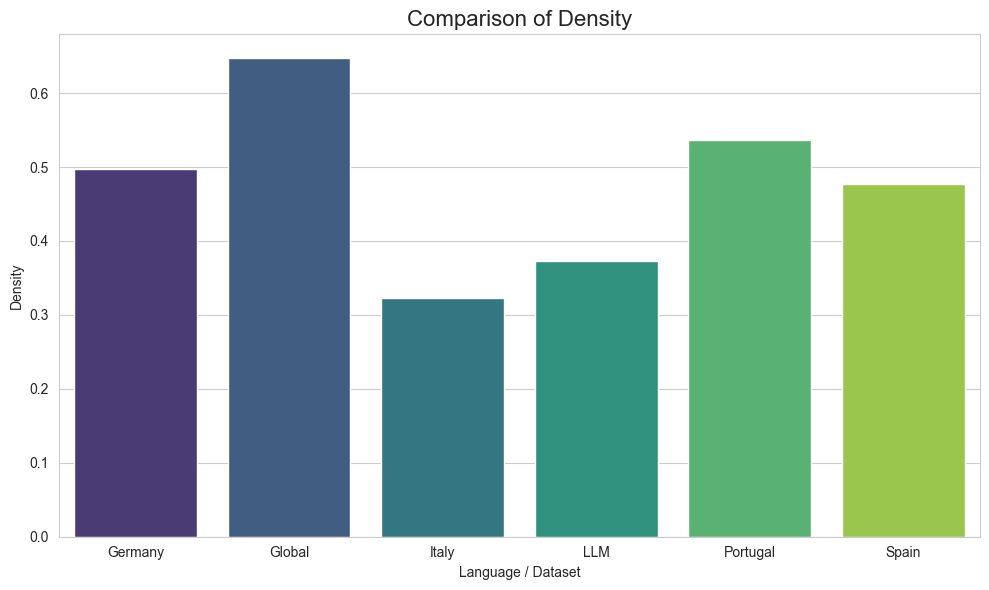

C:\Users\Oscar\AppData\Local\Temp\ipykernel_6352\3411626259.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


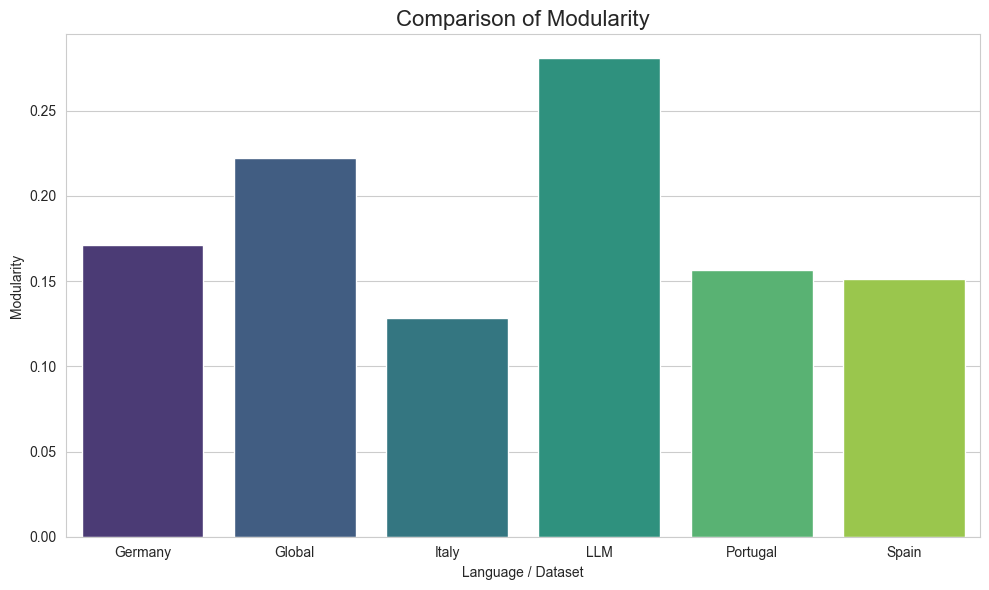

C:\Users\Oscar\AppData\Local\Temp\ipykernel_6352\3411626259.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


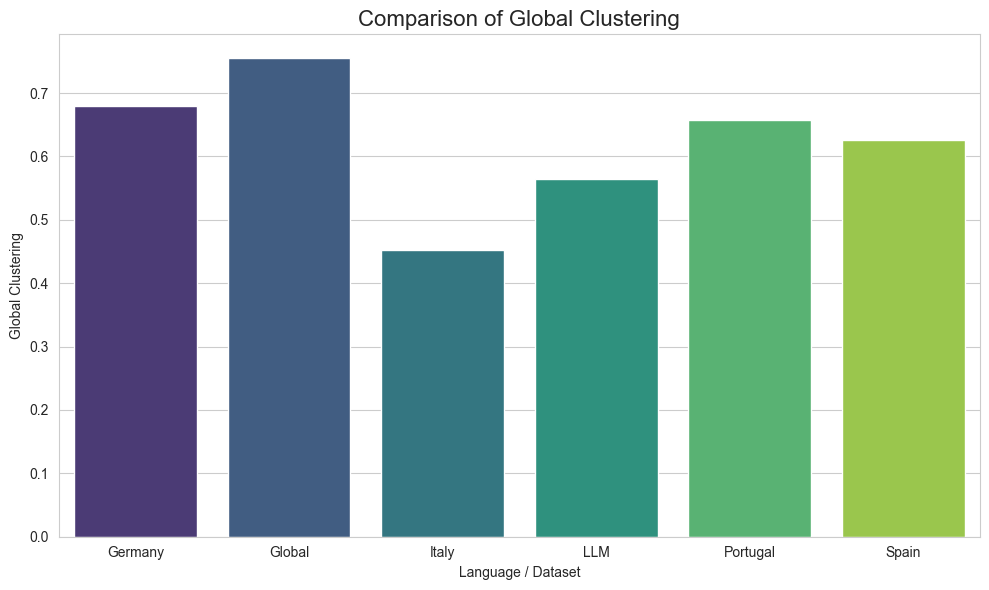

C:\Users\Oscar\AppData\Local\Temp\ipykernel_6352\3411626259.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


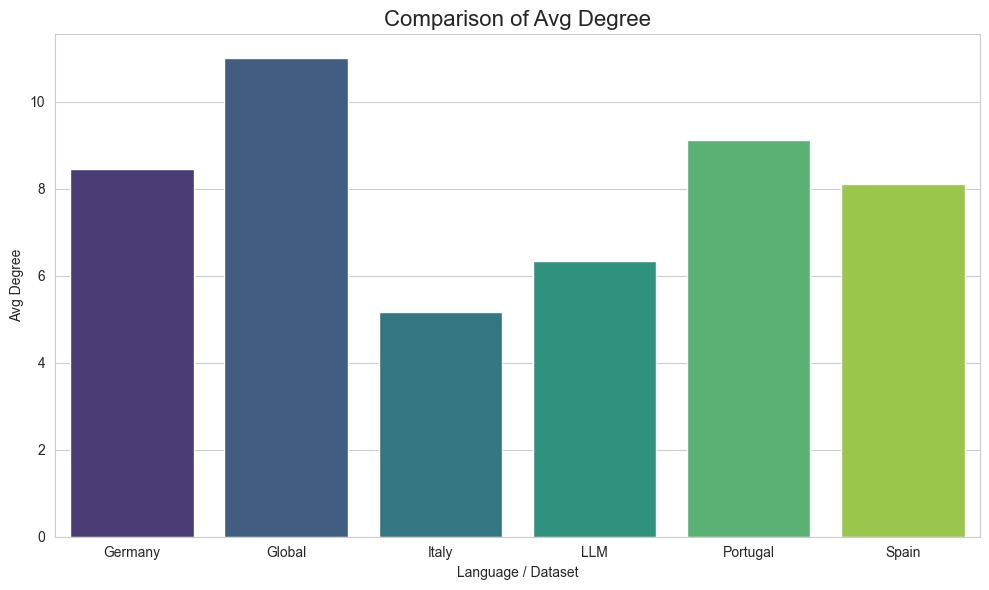

C:\Users\Oscar\AppData\Local\Temp\ipykernel_6352\3411626259.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


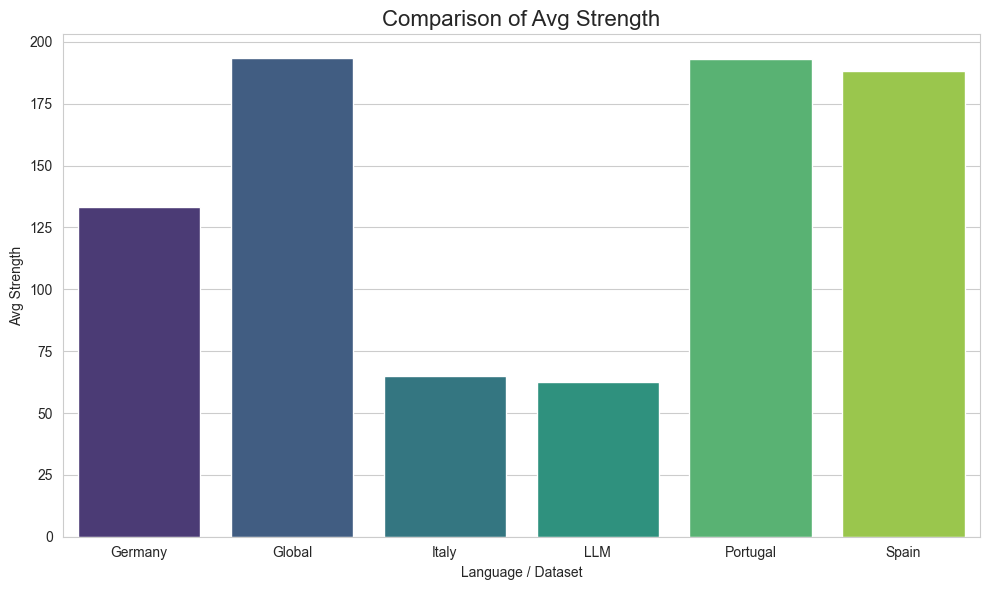

In [6]:
# Run visualizations
metrics_to_plot = ['nodes', 'edges', 'density', 'modularity', 'global_clustering', 'avg_degree', 'avg_strength']
plot_comparison(df_comparison, metrics_to_plot)

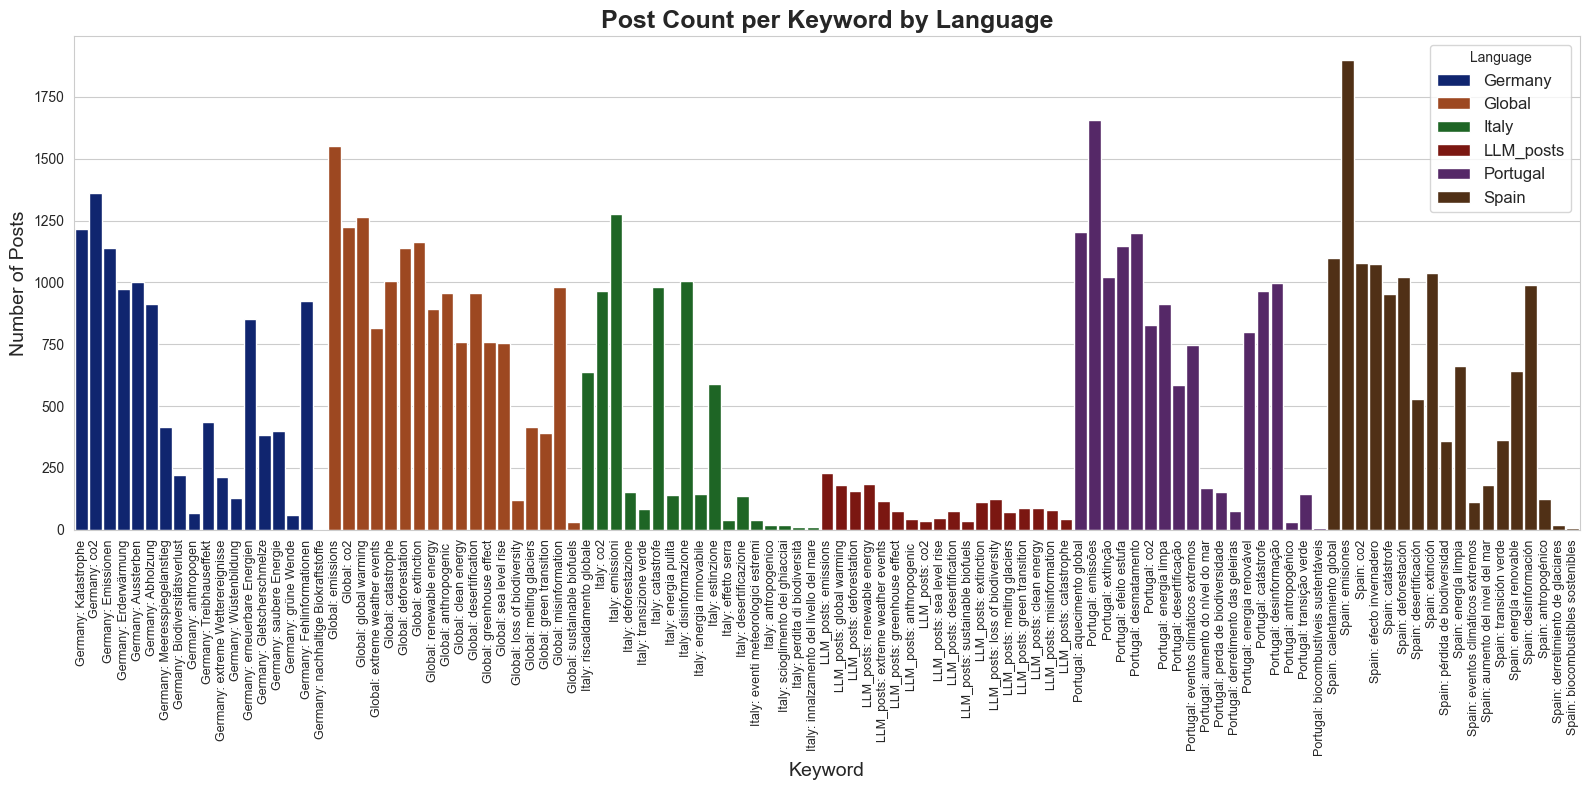

In [7]:
# Run Post Count Visualization
plot_posts_per_keyword(df_nodes)

C:\Users\Oscar\AppData\Local\Temp\ipykernel_6352\3411626259.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_posts_by_lang, x='language', y='post_count', palette='viridis')


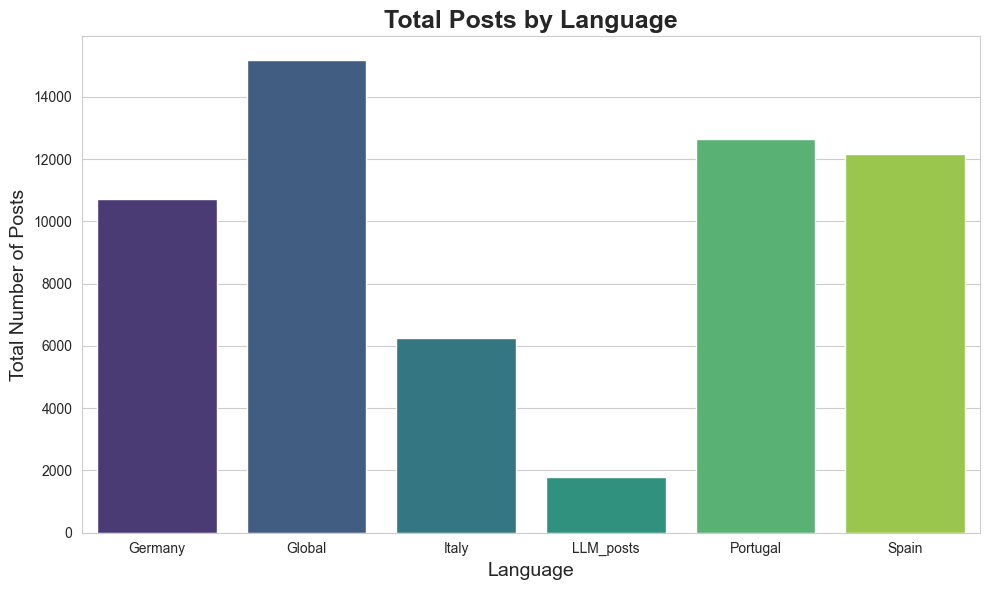

In [8]:
plot_total_posts_by_language(df_nodes)